In [17]:
import pandas as pd
df=pd.read_csv('modeldata.csv')
df

levenshtein_value                                        source_name  \
0                       0  269---Pritam,-Arijit-Singh---Hawayein-(From-Ja...   
1                       0  271---Pritam,-Arijit-Singh,-Antara-Mitra---Jan...   
2                       0  283---Atif-Aslam---Tere-Bin-(From-Bas-Ek-Pal-)...   
3                       0  329---Mustafa-Zahid---Tera-Mera-Rishta_basic_p...   
4                       0  074---Kishore-Kumar---Pyar-Diwana-Hota-Hai---F...   
...                   ...                                                ...   
443206              19993  018---Clinton-Cerejo,-Vishal-Dadlani,-Sonu-Kak...   
443207              20066  519---Javed-Ali,-Kailash-Kher---Arziyan_basic_...   
443208              20110  519---Javed-Ali,-Kailash-Kher---Arziyan_basic_...   
443209              20685  018---Clinton-Cerejo,-Vishal-Dadlani,-Sonu-Kak...   
443210              20686  018---Clinton-Cerejo,-Vishal-Dadlani,-Sonu-Kak...   

                                              target_name  \
0       368---Pritam,-Arijit-Singh---Hawayein_basic_pitch   
1       372---Pritam,-Arijit-Singh,-Antara-Mitra---Jan...   
2       376---Atif-Aslam---Tere-Bin-(From-Bas-Ek-Pal-)...   
3       571---Mustafa-Zahid---Tera-Mera-Rishta_basic_p...   
4       352---Kishore-Kumar---Pyar-Diwana-Hota-Hai-(Fr...   
...                                                   ...   
443206  225---Kavita-Krishnamurthy,-Shreya-Ghoshal,-KK...   
443207  977---Tanishk-Bagchi,-Udit-Narayan,-Alka-Yagni...   
443208  535---Himesh-Reshammiya,-Vineet-Singh,-Aaman-T...   
443209  977---Tanishk-Bagchi,-Udit-Narayan,-Alka-Yagni...   
443210  535---Himesh-Reshammiya,-Vineet-Singh,-Aaman-T...   

                                             source_notes  \
0       1,1,1,8,1,8,8,8,0,3,8,1,1,3,1,8,1,5,8,1,8,3,1,...   
1       8,-2,8,3,8,3,8,8,-1,-1,-1,8,-1,-1,-1,8,-1,-1,8...   
2       8,1,5,12,12,12,5,1,8,1,8,5,8,5,12,5,12,1,1,12,...   
3       7,12,12,3,3,3,12,5,12,3,3,3,3,12,5,5,3,3,5,3,3...   
4       5,1,-4,1,5,1,1,-4,5,1,1,5,5,-2,1,1,5,-4,1,5,-4...   
...                                                   ...   
443206  1,-4,1,1,-6,1,-4,-4,-4,1,1,-4,1,1,-4,1,-4,1,1,...   
443207  1,1,1,1,1,-7,-7,-6,1,-7,-7,3,1,-7,-6,-7,-7,-7,...   
443208  1,1,1,1,1,-7,-7,-6,1,-7,-7,3,1,-7,-6,-7,-7,-7,...   
443209  1,-4,1,1,-6,1,-4,-4,-4,1,1,-4,1,1,-4,1,-4,1,1,...   
443210  1,-4,1,1,-6,1,-4,-4,-4,1,1,-4,1,1,-4,1,-4,1,1,...   

                                             target_notes  \
0       1,1,1,8,1,8,8,8,0,3,8,1,1,3,1,8,1,5,8,1,8,3,1,...   
1       8,-2,8,3,8,3,8,8,-1,-1,-1,8,-1,-1,-1,8,-1,-1,8...   
2       8,1,5,12,12,12,5,1,8,1,8,5,8,5,12,5,12,1,1,12,...   
3       7,12,12,3,3,3,12,5,12,3,3,3,3,12,5,5,3,3,5,3,3...   
4       5,1,-4,1,5,1,1,-4,5,1,1,5,5,-2,1,1,5,-4,1,5,-4...   
...                                                   ...   
443206  8,8,7,3,3,3,10,10,10,2,10,1,1,7,8,8,8,10,10,6,...   
443207  8,-1,8,8,-1,-1,0,8,8,8,8,-1,5,1,1,8,-3,8,8,8,8...   
443208  -4,-4,-4,-4,-7,-4,0,-7,-4,-4,-4,-4,-4,-4,-4,-4...   
443209  8,-1,8,8,-1,-1,0,8,8,8,8,-1,5,1,1,8,-3,8,8,8,8...   
443210  -4,-4,-4,-4,-7,-4,0,-7,-4,-4,-4,-4,-4,-4,-4,-4...   

        normalized_levenshtein  duplicate  
0                     0.000000          1  
1                     0.000000          1  
2                     0.000000          1  
3                     0.000000          1  
4                     0.000000          1  
...                        ...        ...  
443206                0.966499          0  
443207                0.970028          0  
443208                0.972155          0  
443209                0.999952          0  
443210                1.000000          0  

[443211 rows x 7 columns]

In [18]:
import re
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd



    
    
    

In [4]:
# corpus=[]
# for i in range(len(df)):
#     df['source_notes'] = df['source_notes'].str.replace(',','')
#     df['target_notes'] = df['target_notes'].str.replace(',','')
#     df['source_notes'] = df['source_notes'].str.replace('-','')
#     df['target_notes'] = df['target_notes'].str.replace('-','')
#     source = ' '.join(df['source_notes'][i].split())
#     target = ' '.join(df['target_notes'][i].split())
#     sourceandtarget = source + target
#     corpus.append(sourceandtarget)

KeyboardInterrupt: 

In [19]:
corpus = []   #the chords are converted to bag of words to be
#vectorized

for i in range(len(df)):
    source = re.sub(",","",df['source_notes'][i])
    target = re.sub(",","",df['target_notes'][i])
    # source = source.lower()
    # target = target.lower()
    source = source.split()
    target = target.split()
    source = ' '.join(source)
    target = ' '.join(target)
    sourceandtarget = source + target
    corpus.append(sourceandtarget)

In [20]:
corpus

['11181888038113181581831851818186818110880180111081668616105151518811815180883101583188881518681018366088881016816818808088086118810138088111381158858886181110618880688086110666181668061101558881111118181100881813511881811851618110686801806110801118608880111558188311180813888081856001611015868610606010180668616861056551181181881501838180815118110681851016510681688610880166110161668800888611558585088530115555581515510558668108505581105151516155361181188110610381108111016686181103880101811091011110335313318308031831838831330881630108808308038800185010188818381888836168381868868151581118558818515518515851881581888111551881518815556615588388315111610616610111510661061510101061018161016110861011561011103110331551031183838358338111038338381038313883130883080210811018810815818138183818838888381011111008106610661965610661106611011063118666811011061831010661111516111003661061061661811881185851185110188888118111081881810118118111818108108101016110151016151011011111106161618611110-11068661886811

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 577)
X = cv.fit_transform(corpus).toarray()

In [31]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['source_encoded'] = le.fit_transform(df['source_notes'])
# df['target_encoded'] = le.fit_transform(df['target_notes'])
# df
X


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
y = df['duplicate']    #train test spliting happens
from sklearn.model_selection import train_test_split
#df['source_notes'] = df['source_notes'].astype("double")
#df['target_notes'] = df['target_notes'].astype("double")
# X = df[['source_encoded', 'target_encoded']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
     

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [25]:
y_pred = classifier3.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

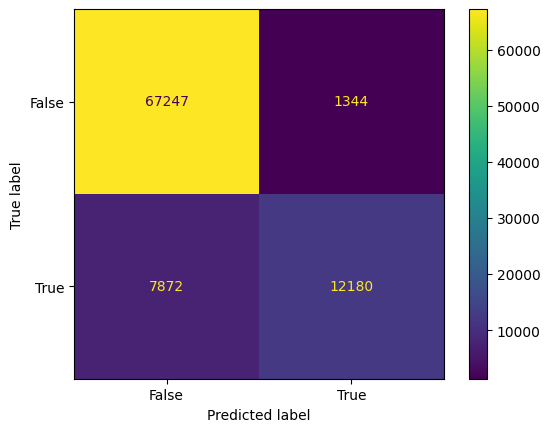

In [26]:
import matplotlib.pyplot as plt
# Visualise classical Confusion M0atrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
CM = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()



In [27]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     68591
           1       0.90      0.61      0.73     20052

    accuracy                           0.90     88643
   macro avg       0.90      0.79      0.83     88643
weighted avg       0.90      0.90      0.89     88643



In [33]:
new_data= [X[2],X[3]]
y_pred = classifier3.predict(new_data)
y_pred

array([0, 0], dtype=int64)